# Real Estate Project - Monte Carlo Simulation (Part 1)

This notebook gives you the ability to open a saved Excel file that has a basic valuation model in it. 

Some quick notes: 
* we will use xlwings, numpy, and matplotlib
* our Excel workbook will act as a GUI only; all analytical work will run through Python
* results will be displayed in Excel with a cross application call
* be aware that a high number of simulations will take several minutes to complete

## Running a simple Monte Carlo Simulation

In [1]:
# here we can import the libraries that we need for our simulation
# if libraries are not imported, refer to documentation to pip install manually

import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# assign real_state.xlsx: wb
# assigning to a variable will make it easier to call the wb

wb = xw.Book("real_estate.xlsx")

In [3]:
# assign a variable to the first worksheet in the book: inp
# allows us to make calls to locations within this sheet

inp = wb.sheets[0]
inp

<Sheet [real_estate.xlsx]Input>

In [4]:
# naming ranges for better readability
# consumer price index

inp["D20"].name = "cpi"

We can name ranges from our workbook. In the following example, I have named D20: cpi

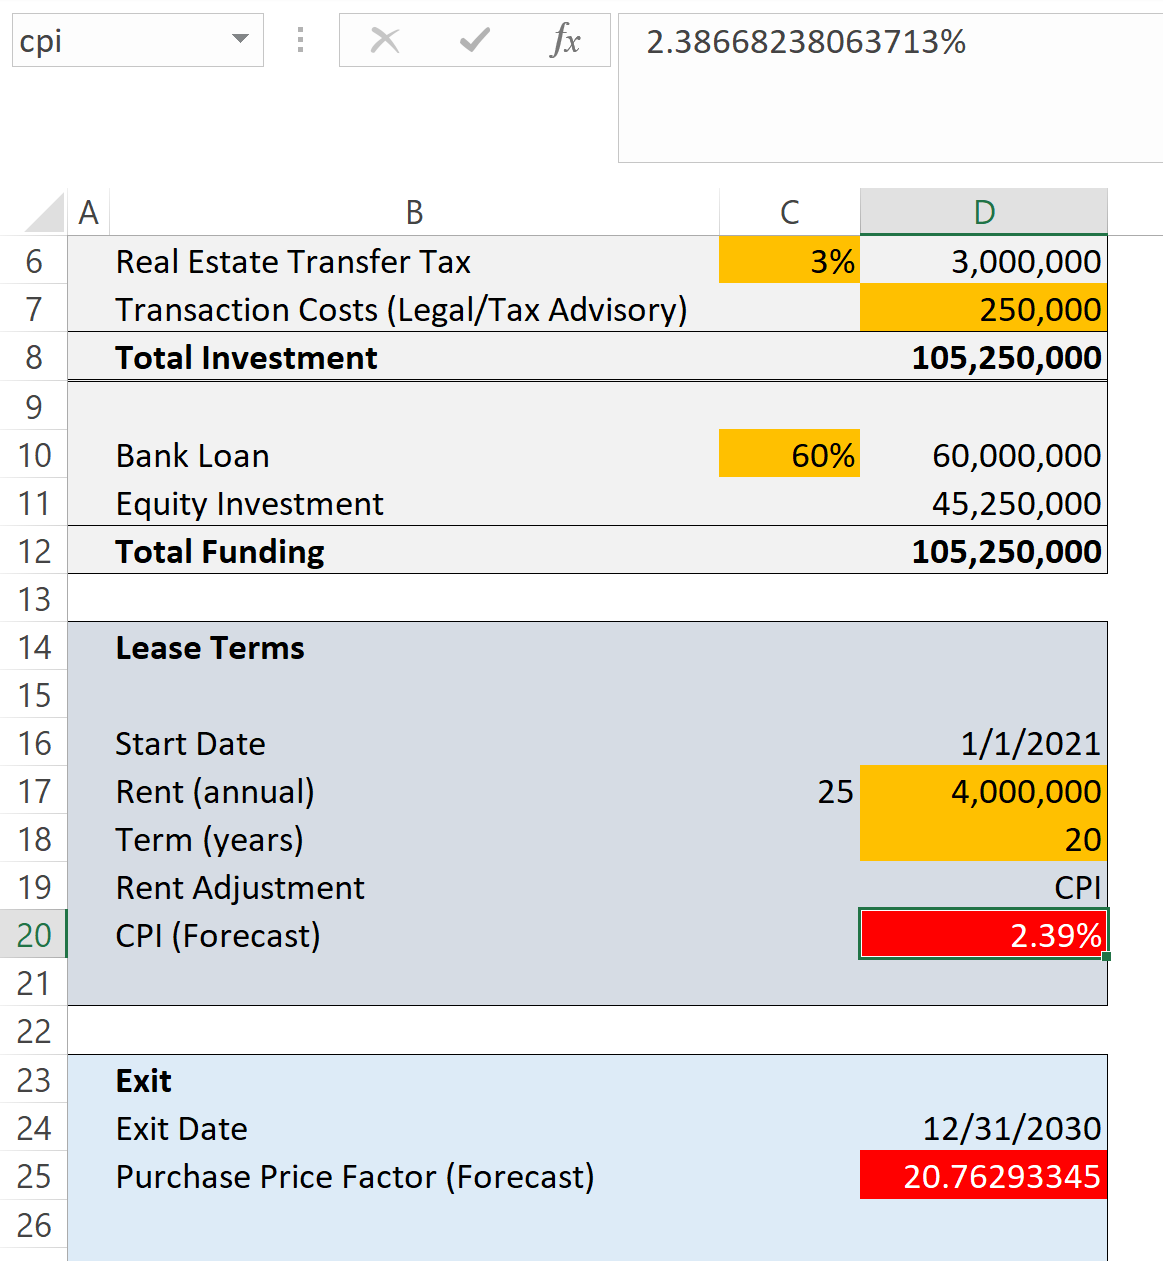


In [5]:
inp["D25"].name = "ppf"

In [6]:
inp["D40"].name = "cost"

In [7]:
inp["G24:G25"].name = "performance"

In [8]:
# reads in what is currently in the performance range

inp["performance"].value

[1.4810622095993797, 0.042545858025550845]

__Probability Distribution CPI (normal)__

In [9]:
# monte carlo simulations assume a probability distribution for sims
# lets add some variability
# the expected value of cpi is 0.02; the standard deviation is 0.01

cpi_exp = 0.02
cpi_std = 0.01

In [10]:
# specify how many sims we would like to run
# caution: a high number of sims may take several minutes to complete
# the lag time is due to cross applications calls

sims = 10000

In [11]:
cpi_pd = np.random.normal(cpi_exp, cpi_std, sims)
cpi_pd

array([0.03533943, 0.02546308, 0.01934229, ..., 0.01264114, 0.02302461,
       0.03231885])

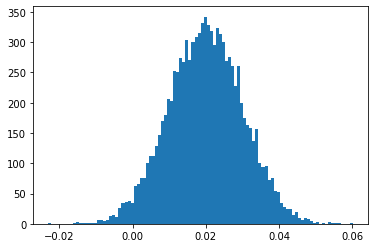

In [12]:
# plot the distribution to see results

plt.hist(cpi_pd, bins = 100)
plt.show()

__Probability Distribution Purchase Price Factor (normal)__

In [13]:
ppf_exp = 23
ppf_std = 3

In [14]:
ppf_pd = np.random.normal(ppf_exp, ppf_std, sims)
ppf_pd

array([20.33310777, 22.12724221, 21.3807104 , ..., 18.77937704,
       20.94452231, 25.94808506])

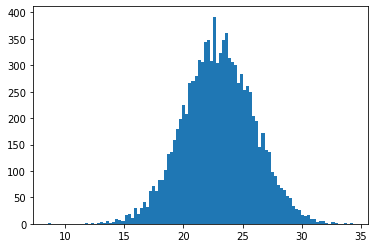

In [15]:
# higher number of sims will give better distributions

plt.hist(ppf_pd, bins = 100)
plt.show()

__Probability Distribution Costs (normal)__

In [16]:
cost_exp = 250000
cost_std = 50000

__Final Assumption: No Correlation between Inputs (can be changed)__

In [17]:
sims = 1000

In [18]:
# executing this cell will begin the sim in Excel GUI
# results of each sim will be saved and we can examine distributions within this notebook
# we are creating a for loop that simulates cpi, ppf, and cost n times, where n is # of sims
# results[i] at the end broadcasts the value to the Excel value at each pass
# you will notice that the values highlighted in red (key assumptions) change as we loop through them
# likewise, the target values (investment mult., IRR) will change

results = np.empty((sims, 2))
for i in range(sims):
    inp["cpi"].value = np.random.normal(cpi_exp, cpi_std)
    inp["ppf"].value = np.random.normal(ppf_exp, ppf_std)
    inp["cost"].value = np.random.normal(cost_exp, cost_std)
    results[i] = inp["performance"].value
    
# we did something very powerful here - we stored the results to a np array
# now we can use the np library to examine this data in the future! 

In [19]:
results

array([[ 9.89655444e-01, -1.10927969e-03],
       [ 1.37251027e+00,  3.42716545e-02],
       [ 1.60144784e+00,  5.06093472e-02],
       ...,
       [ 1.74760007e+00,  6.10565811e-02],
       [ 1.71629494e+00,  5.91708511e-02],
       [ 1.78326542e+00,  6.30757779e-02]])

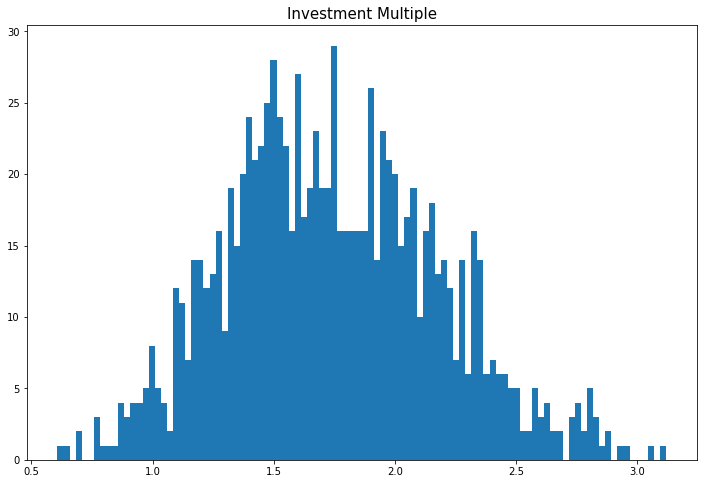

In [20]:
plt.figure(figsize = (12, 8))
plt.hist(results[:, 0], bins = 100)
plt.title("Investment Multiple", fontsize = 15)
plt.show()

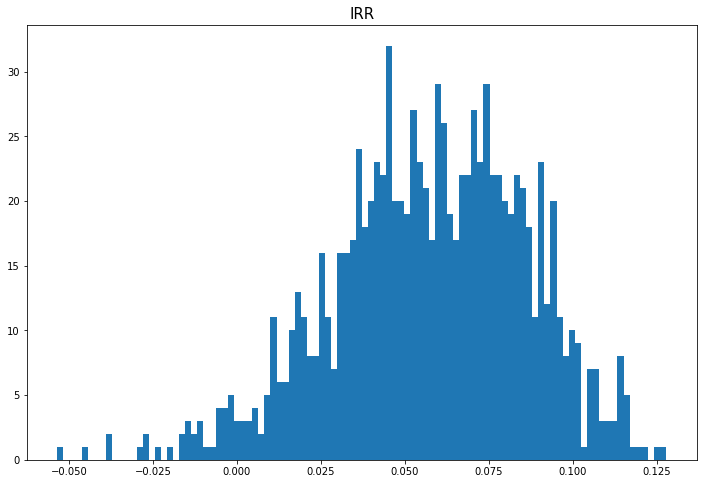

In [21]:
plt.figure(figsize = (12, 8))
plt.hist(results[:, 1], bins = 100)
plt.title("IRR", fontsize = 15)
plt.show()

In [22]:
# axis 0 refers to being along the column
# axis 1 refers to row

results.mean(axis = 0)

# recall what is included in results: 
# executing this cell will begin the sim in Excel GUI
# results of each sim will be saved and we can examine distributions within this notebook

# results = np.empty((sims, 2))
# for i in range(sims):
#     inp["cpi"].value = np.random.normal(cpi_exp, cpi_std)
#     inp["ppf"].value = np.random.normal(ppf_exp, ppf_std)
#     inp["cost"].value = np.random.normal(cost_exp, cost_std)
#     results[i] = inp["performance"].value

array([1.74424938, 0.05744249])

In [23]:
np.median(results, axis = 0)

array([1.71700048, 0.05916351])

In [24]:
# sum of results where performance is less than 0

sum(results[:, 0] < 1) / sims

0.036

# End Simulation